<a href="https://colab.research.google.com/github/RKNahid/ML_815/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 02**

In [1]:
import numpy as np
import pandas as pd

In [2]:
a2 = pd.read_excel("/content/drive/MyDrive/Project/Assignment1/customer_churn_prediction.xlsx")
target = "Churn"

**Show first five row**

In [3]:
a2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Show shape of dataset**

In [4]:
a2.shape

(7043, 21)

**Display whether there is null value or not and if so handle those**

In [5]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*There are null Values in TotalCharges column. Lets handle this column*

In [6]:
a2['TotalCharges'] = a2['TotalCharges'].fillna(a2['TotalCharges'].mean())
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Count target values**

In [7]:
a2_c = a2['Churn'].value_counts()
print(a2_c)

No     5174
Yes    1869
Name: Churn, dtype: int64


**Plot target values**

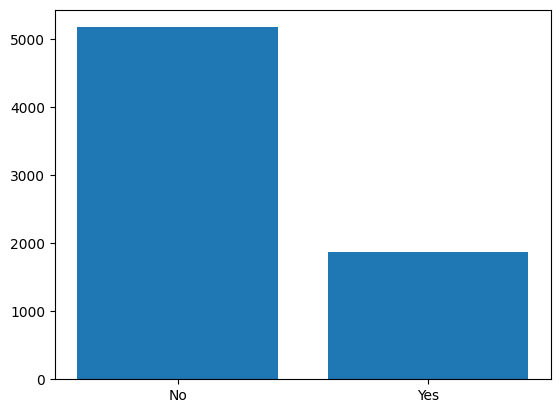

In [9]:
import matplotlib.pyplot as plt
plt.bar(a2_c.index, a2_c.values)

plt.show()

**Label Encoding**

In [10]:
a2 = a2.drop('customerID',axis=1)
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
from sklearn.preprocessing import LabelEncoder

ob_col = a2.select_dtypes(include=['object']).columns

en = LabelEncoder()

a2[ob_col] = a2[ob_col].apply(lambda col: en.fit_transform(col))

In [12]:
a2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


**Copying dataframe**

In [13]:
a21 = a2.copy()
a22 = a2.copy()
a23 = a2.copy()
a24 = a2.copy()

*Spliting dataframe for train test and target data. Using Logistic Regression Algorithm*

***Testing Accuracy before OverSampling & UnderSampling***

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
x = a21.loc[:,a21.columns != target]
y = a21[target]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
y_train.value_counts()

0    4129
1    1505
Name: Churn, dtype: int64

Values are without sampling

**Training Phase**

In [18]:
from sklearn.linear_model import LogisticRegression

train1 = LogisticRegression()

train1.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = train1.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[928 117]
 [168 196]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1045
           1       0.63      0.54      0.58       364

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy:  0.7977288857345636


***Without any sampling Accuracy is 79%***

***Testing Accuracy after OverSampling***

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
x = a22.loc[:,a22.columns != target]
y = a22[target]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
y_train.value_counts()

0    4131
1    1503
Name: Churn, dtype: int64

In [25]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
x_train, y_train = balance(x_train, y_train)

In [27]:
y_train.value_counts()

0    4131
1    4131
Name: Churn, dtype: int64

*Over Sampling Done*

**Training Phase**

In [29]:
from sklearn.linear_model import LogisticRegression

train2 = LogisticRegression()

train2.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = train2.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[810 233]
 [100 266]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1043
           1       0.53      0.73      0.62       366

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Accuracy:  0.7636621717530163


***With over sampling Accuracy is 76%***

**Testing Accuracy after UnderSampling**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
x = a23.loc[:,a23.columns != target]
y = a23[target]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
y_train.value_counts()

0    4126
1    1508
Name: Churn, dtype: int64

In [38]:
!pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler

def balance(x_temp,y_temp):
  rus = RandomUnderSampler()
  x_temp, y_temp = rus.fit_resample(x_temp, y_temp)

  return x_temp, y_temp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
x_train, y_train = balance(x_train, y_train)

In [40]:
y_train.value_counts()

0    1508
1    1508
Name: Churn, dtype: int64

*Under Sampling Done*

**Training Phase**

In [41]:
from sklearn.linear_model import LogisticRegression

train3 = LogisticRegression()

train3.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = train3.predict(x_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[767 281]
 [ 69 292]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1048
           1       0.51      0.81      0.63       361

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409

Accuracy:  0.751596877217885


***With under sampling Accuracy is 75%***